In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
embryo.integrated <- readRDS("/home/adufour/work/rds_storage/omics/stemcell_multi_species_obj_v3.rds")

In [3]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

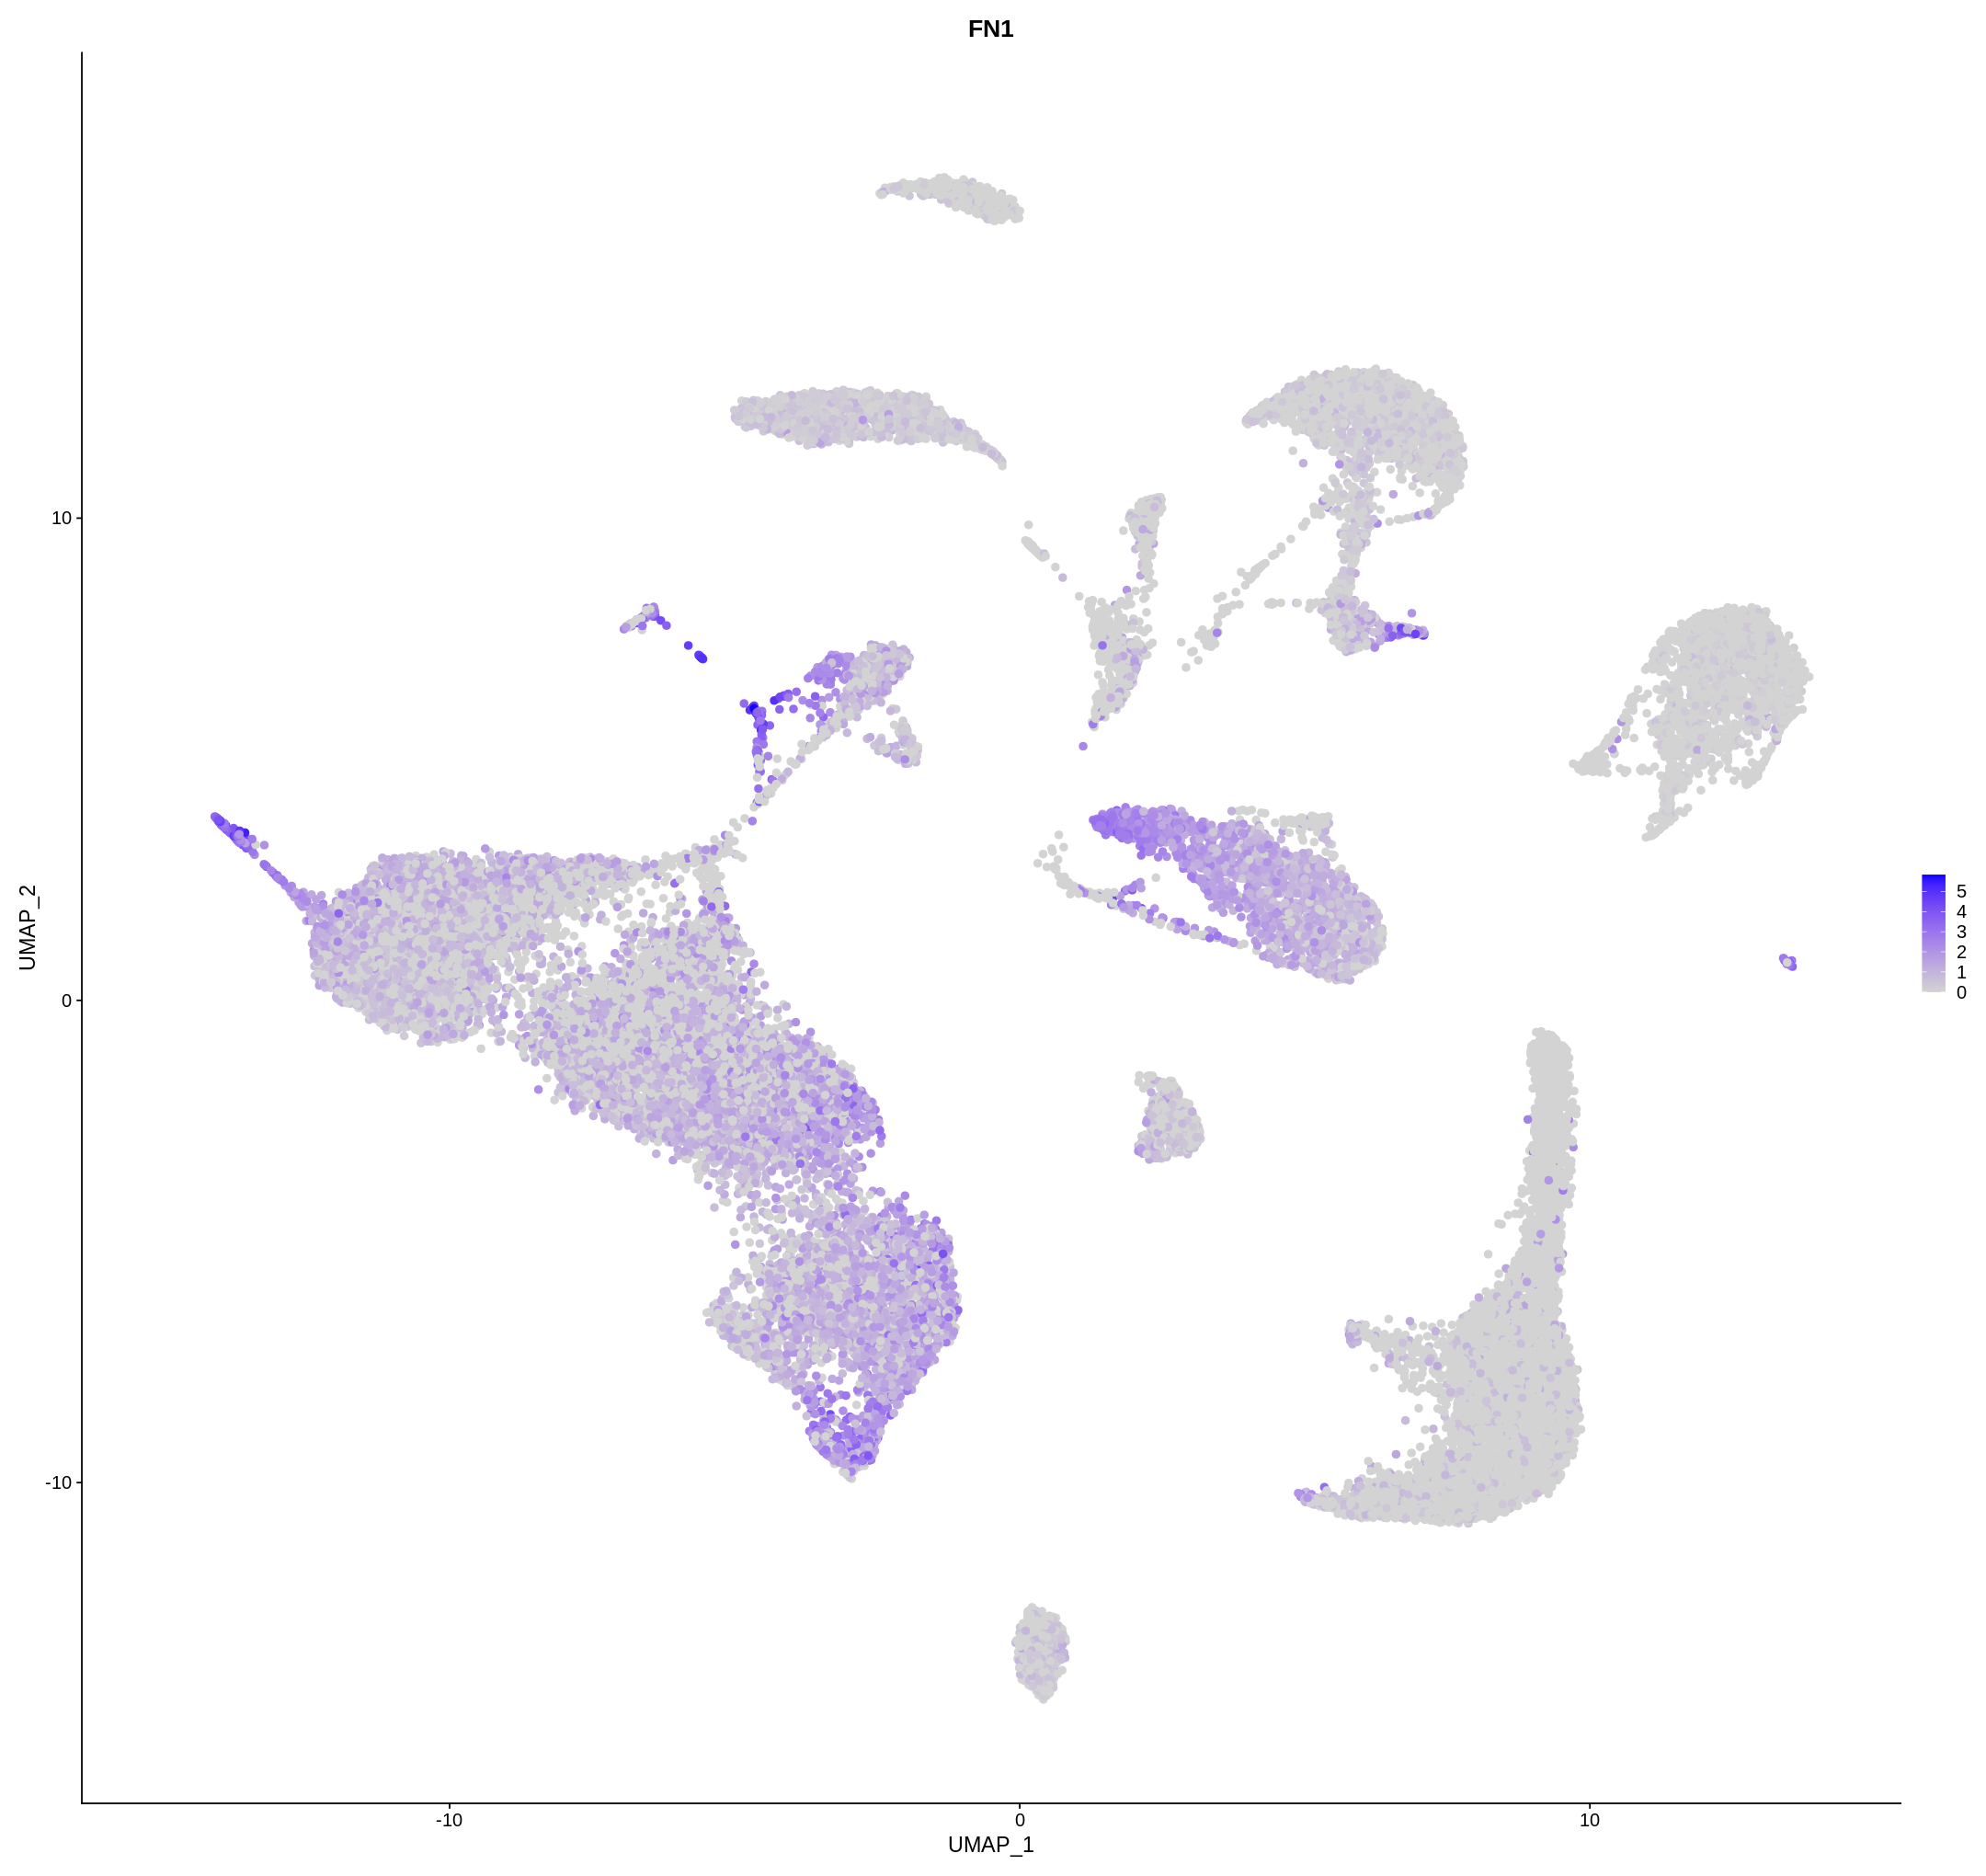

In [4]:
FeaturePlot(embryo.integrated, pt.size = 2, "FN1")

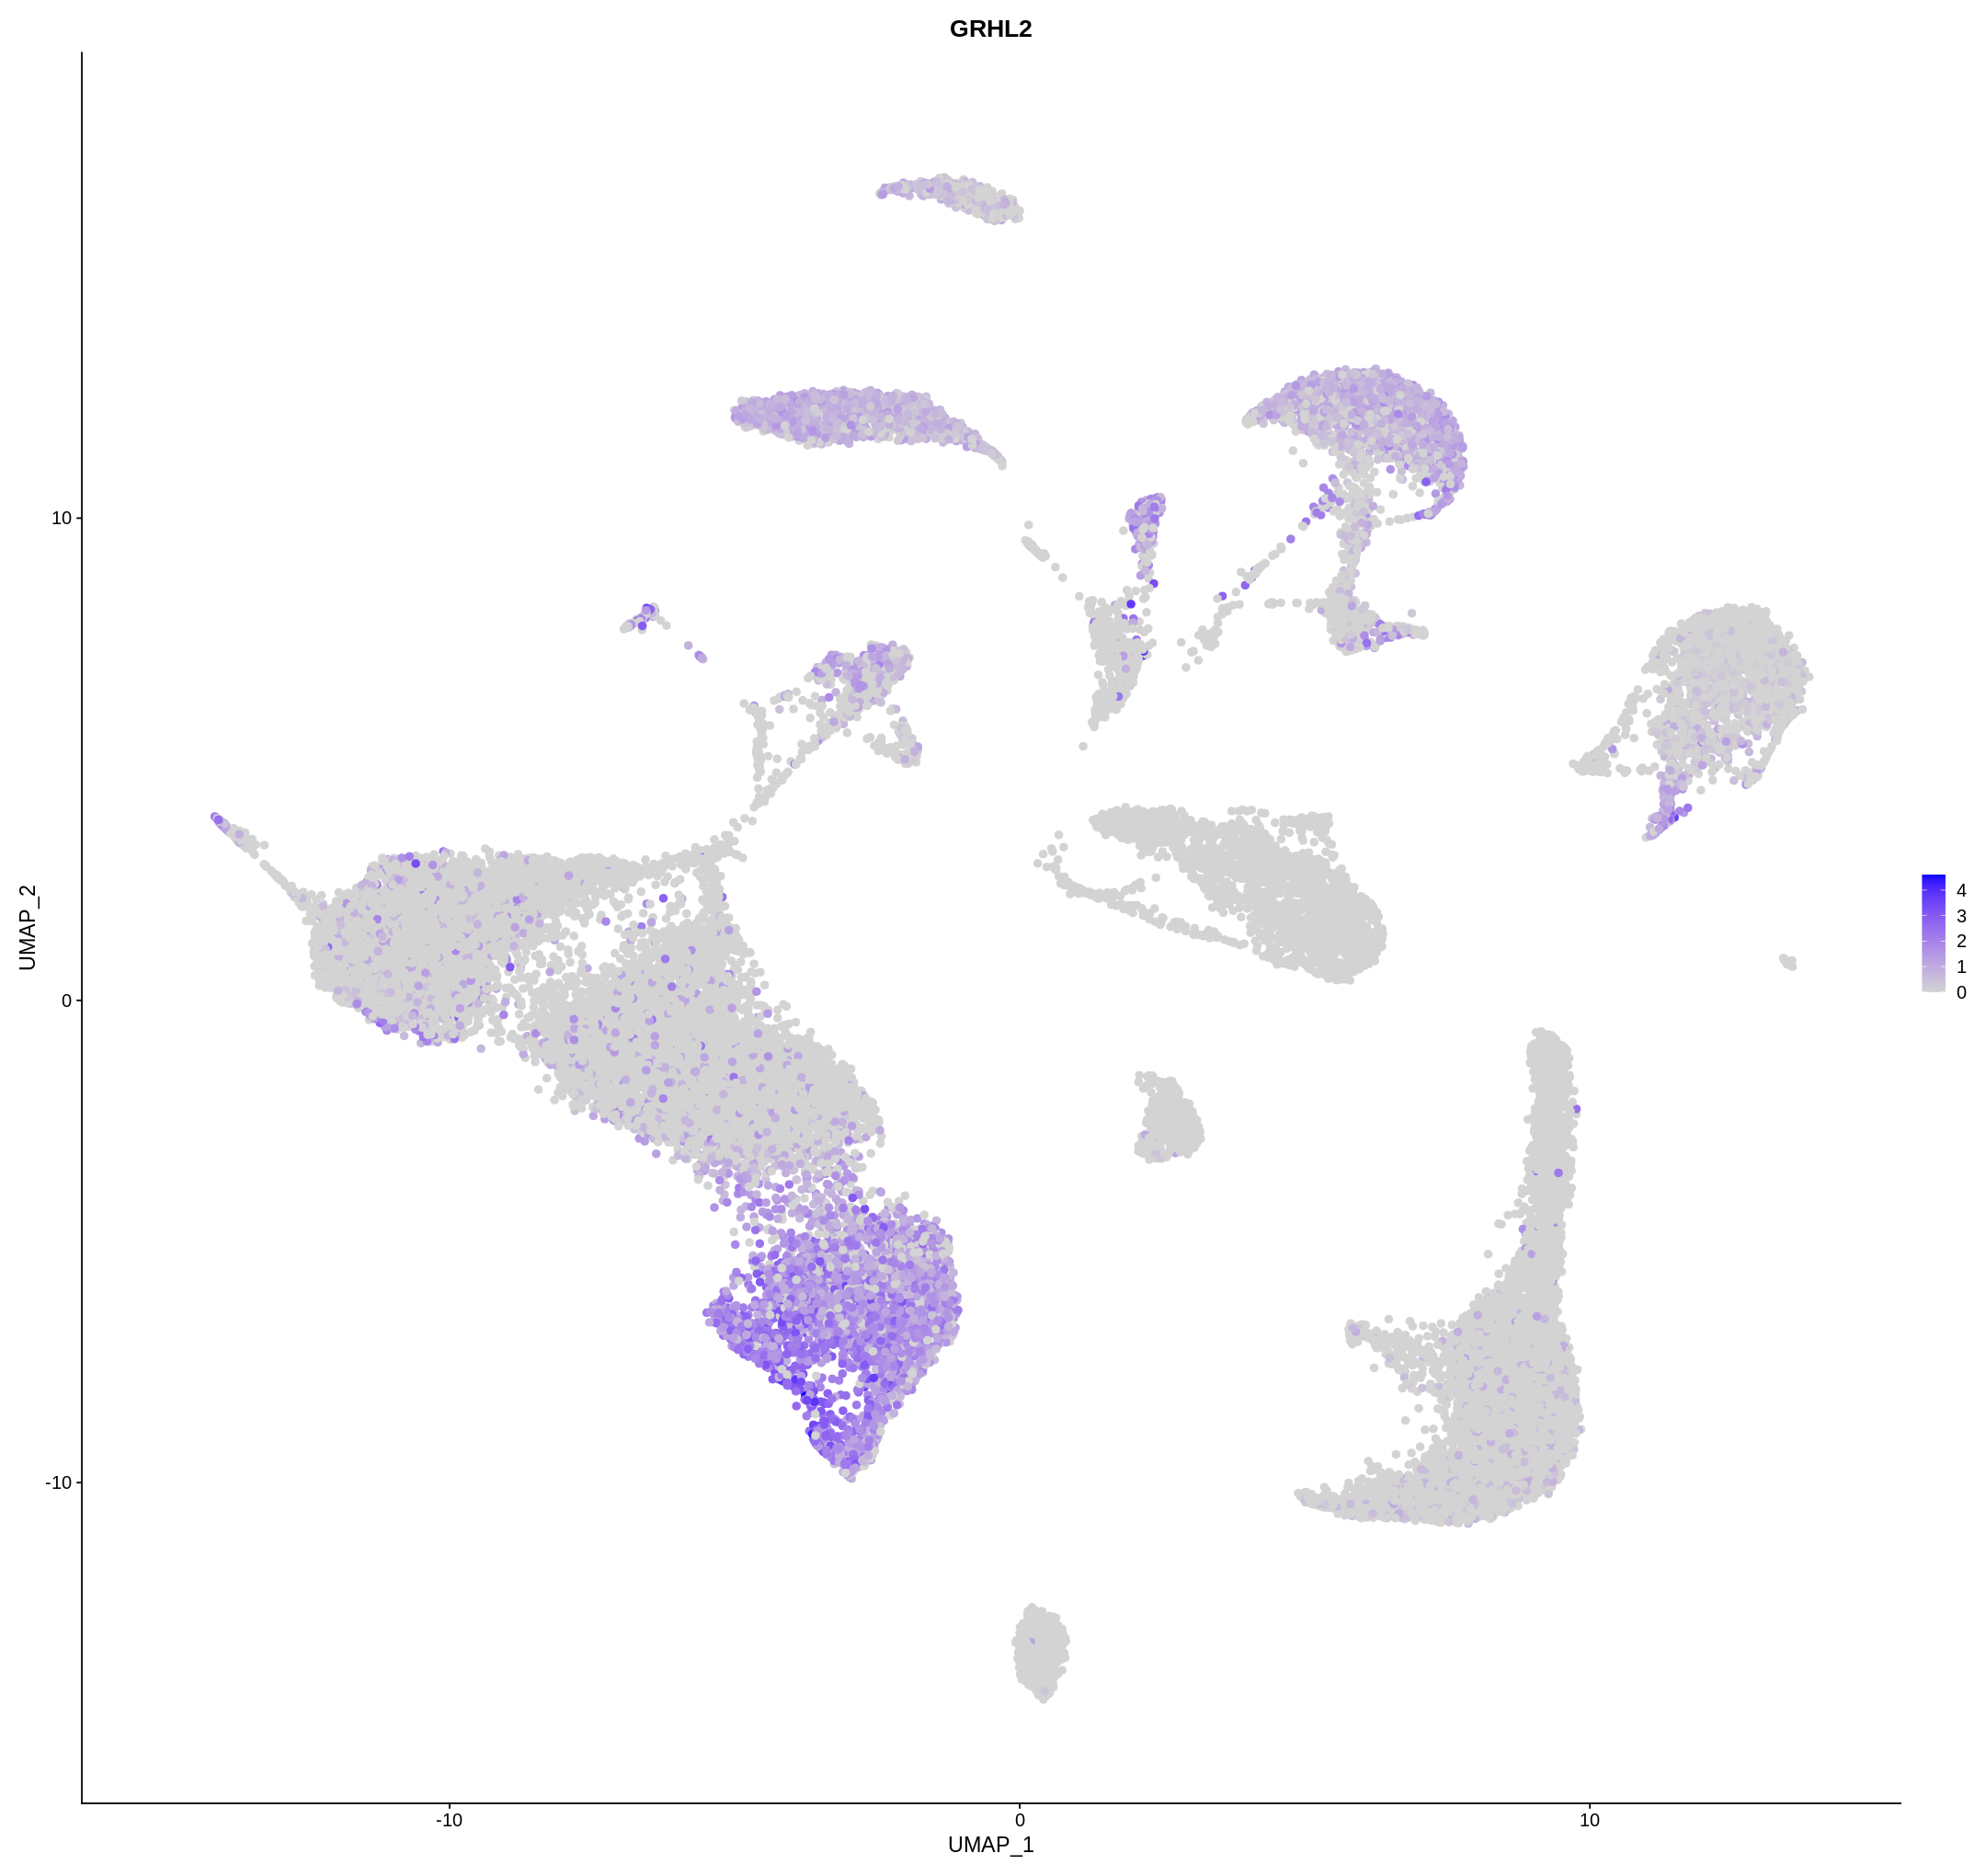

In [5]:
FeaturePlot(embryo.integrated, pt.size = 2, "GRHL2")

In [10]:
custom_colors <- list()

colors_dutch <- c(
  '#fd79a8',"#00b894","#fdcb6e","#ce8787",'#0984e3',
  '#74b9ff','#3498db','#2980b9','#D980FA','#f1c40f',
  '#e74c3c','#009432','#0652DD','#9980FA','#833471',
  '#EA2027','#006266','#1B1464','#5758BB','#6F1E51'
)

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

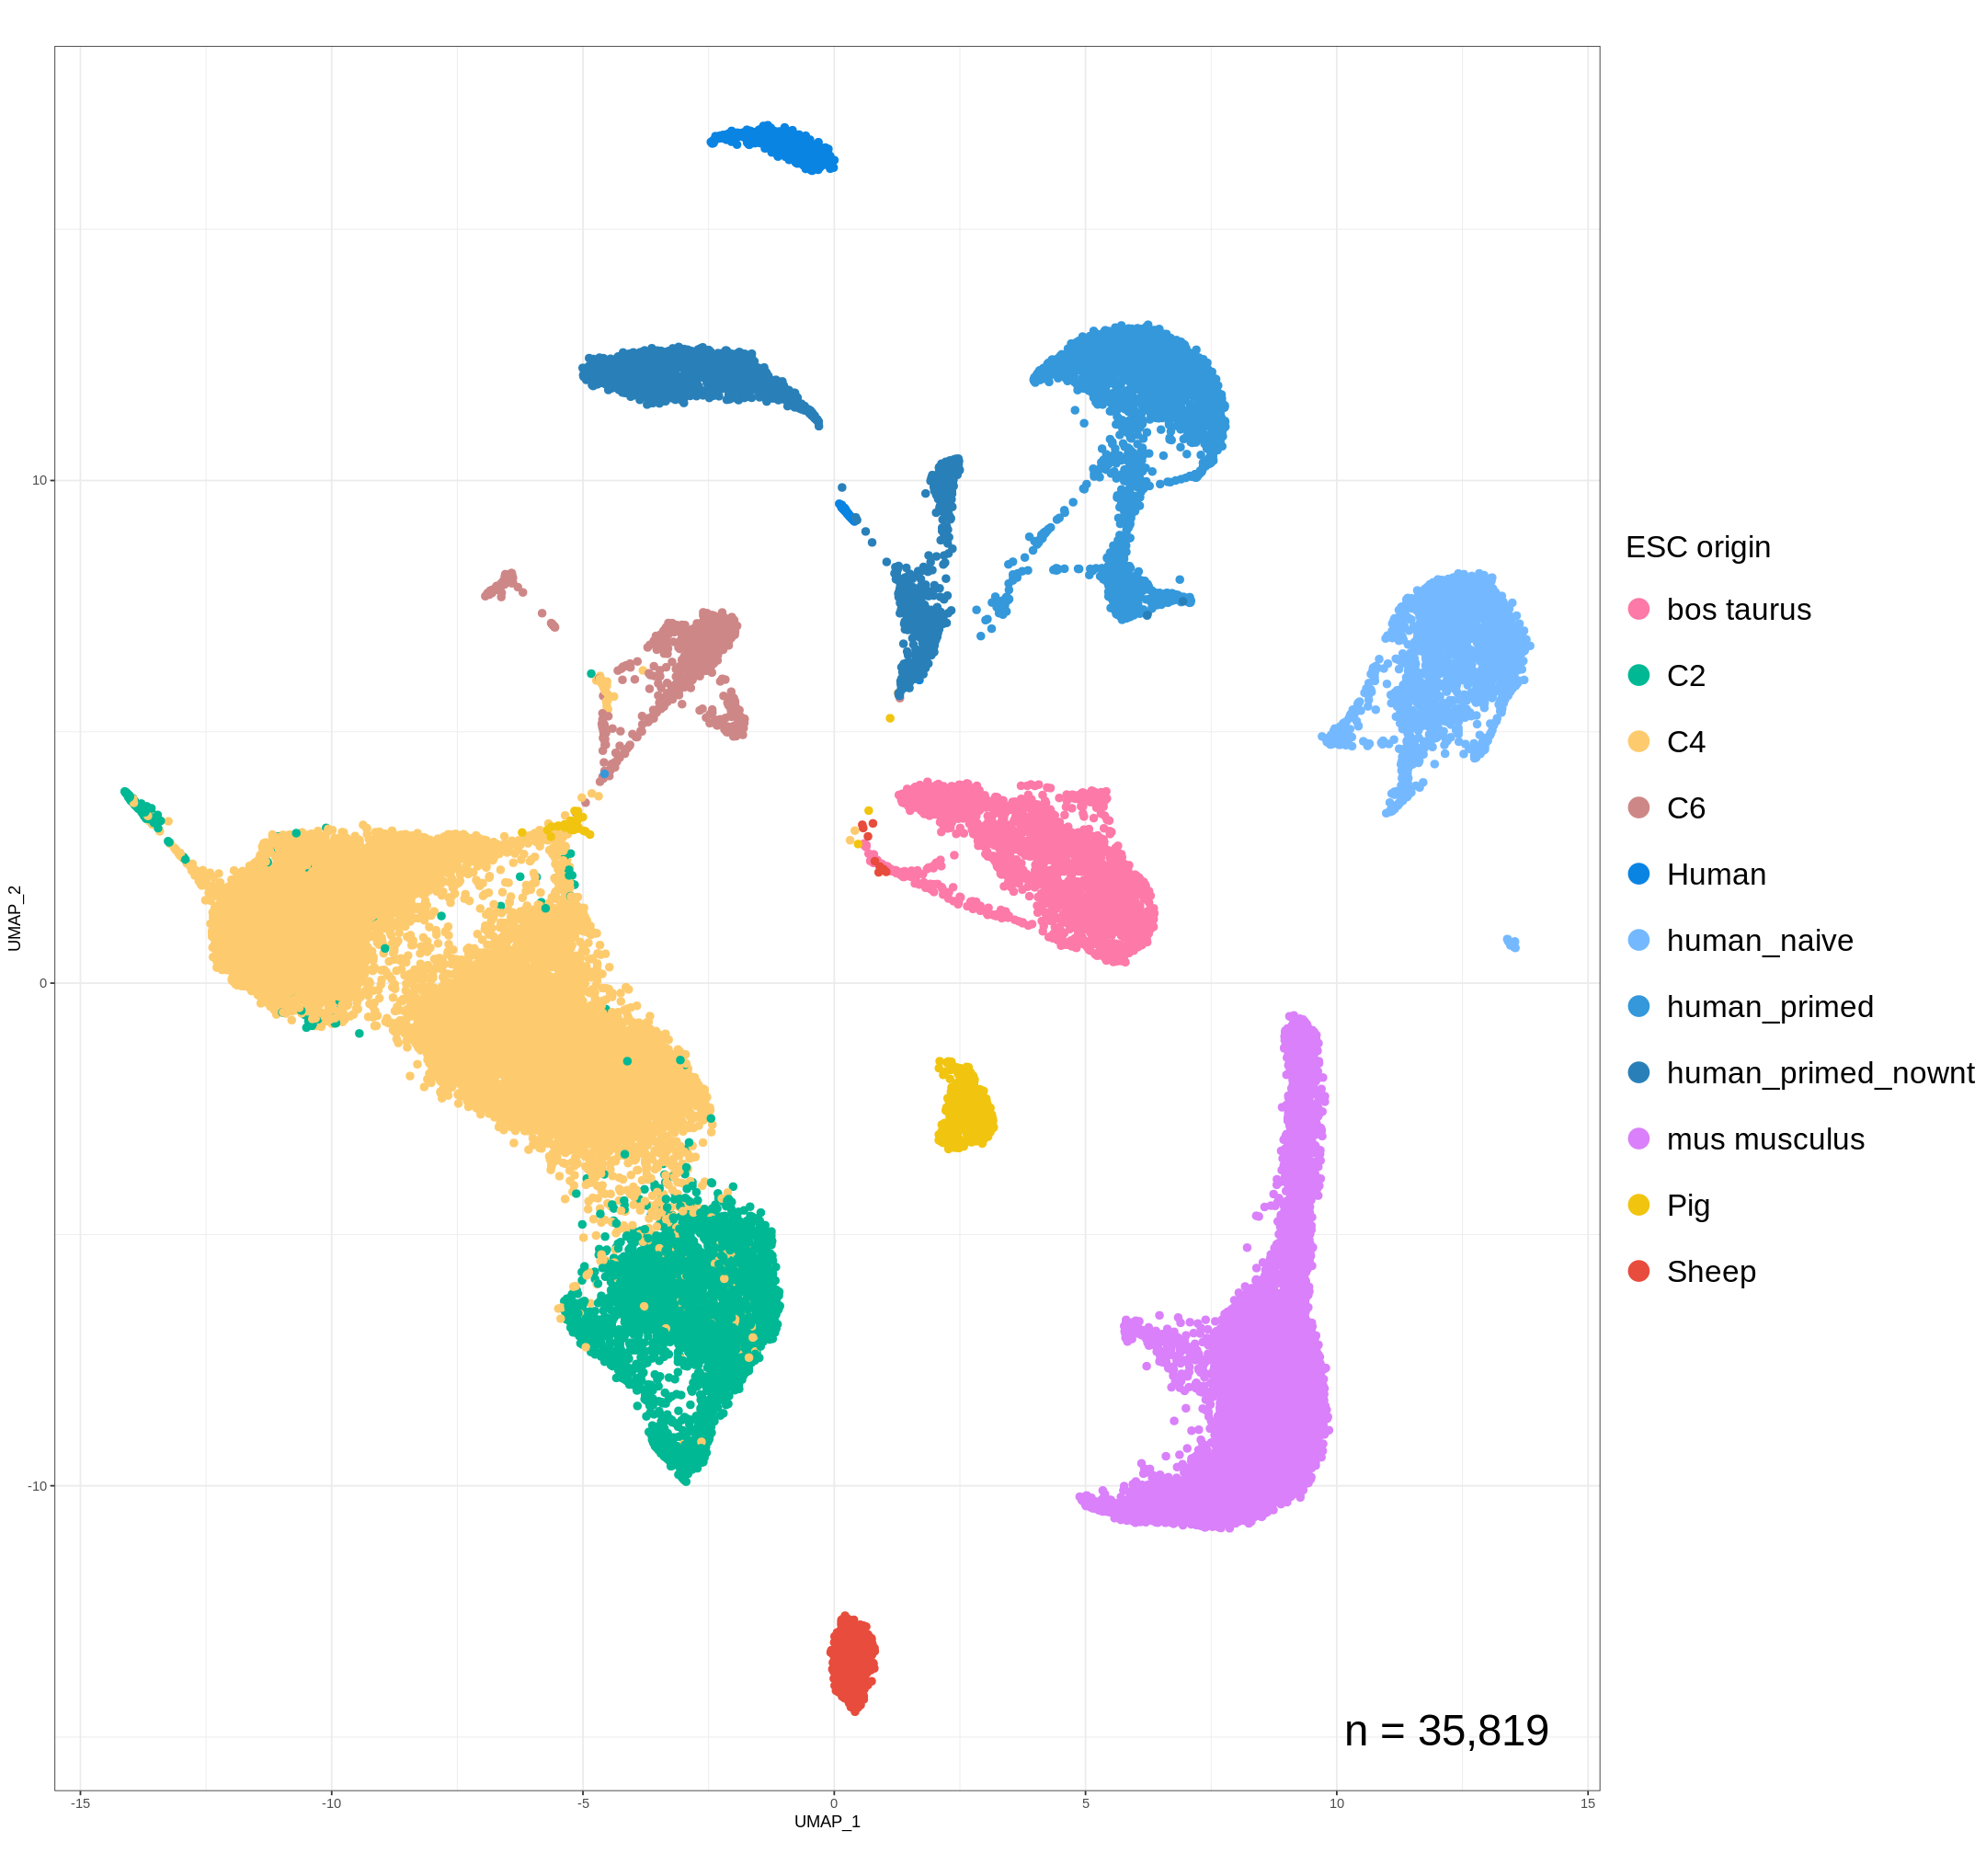

In [12]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = as.data.frame(embryo.integrated@reductions$umap@cell.embeddings)$UMAP_1,
    UMAP_2 = as.data.frame(embryo.integrated@reductions$umap@cell.embeddings)$UMAP_2,
    species = embryo.integrated@meta.data$species
  ) %>%
  group_by(species) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

plot_umap_cluster <- bind_cols(embryo.integrated@meta.data, as.data.frame(embryo.integrated@reductions$umap@cell.embeddings)) %>%
  ggplot(aes(UMAP_1, UMAP_2, color = species)) +
  geom_point(size = 2) +
  theme_bw() +
  #expand_limits(x = c(-10,10.5), y = c(-10,10)) +
  scale_color_manual(values = custom_colors$discrete) +
  labs(color = 'ESC origin') +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  theme(
      legend.position = 'right',
      legend.title = element_text(size = 20),
      legend.text = element_text(size = 20),
      legend.key.height = unit(3,"line")
  ) +
  coord_fixed() +
  annotate(
    geom = 'text', 
    x = Inf, 
    y = -Inf,
    label = paste0('n = ', format(nrow(embryo.integrated@meta.data), big.mark = ',', trim = TRUE)),
    vjust = -1.5,
    hjust = 1.25,
    color = 'black',
    size = 10
  )

plot_umap_cluster

In [13]:
ggsave(
  '/home/adufour/work/notebook/plots/omics/UMAP/UMAP_stemcells.svg',
  plot_umap_cluster,
  height = 18,
  width = 20
)

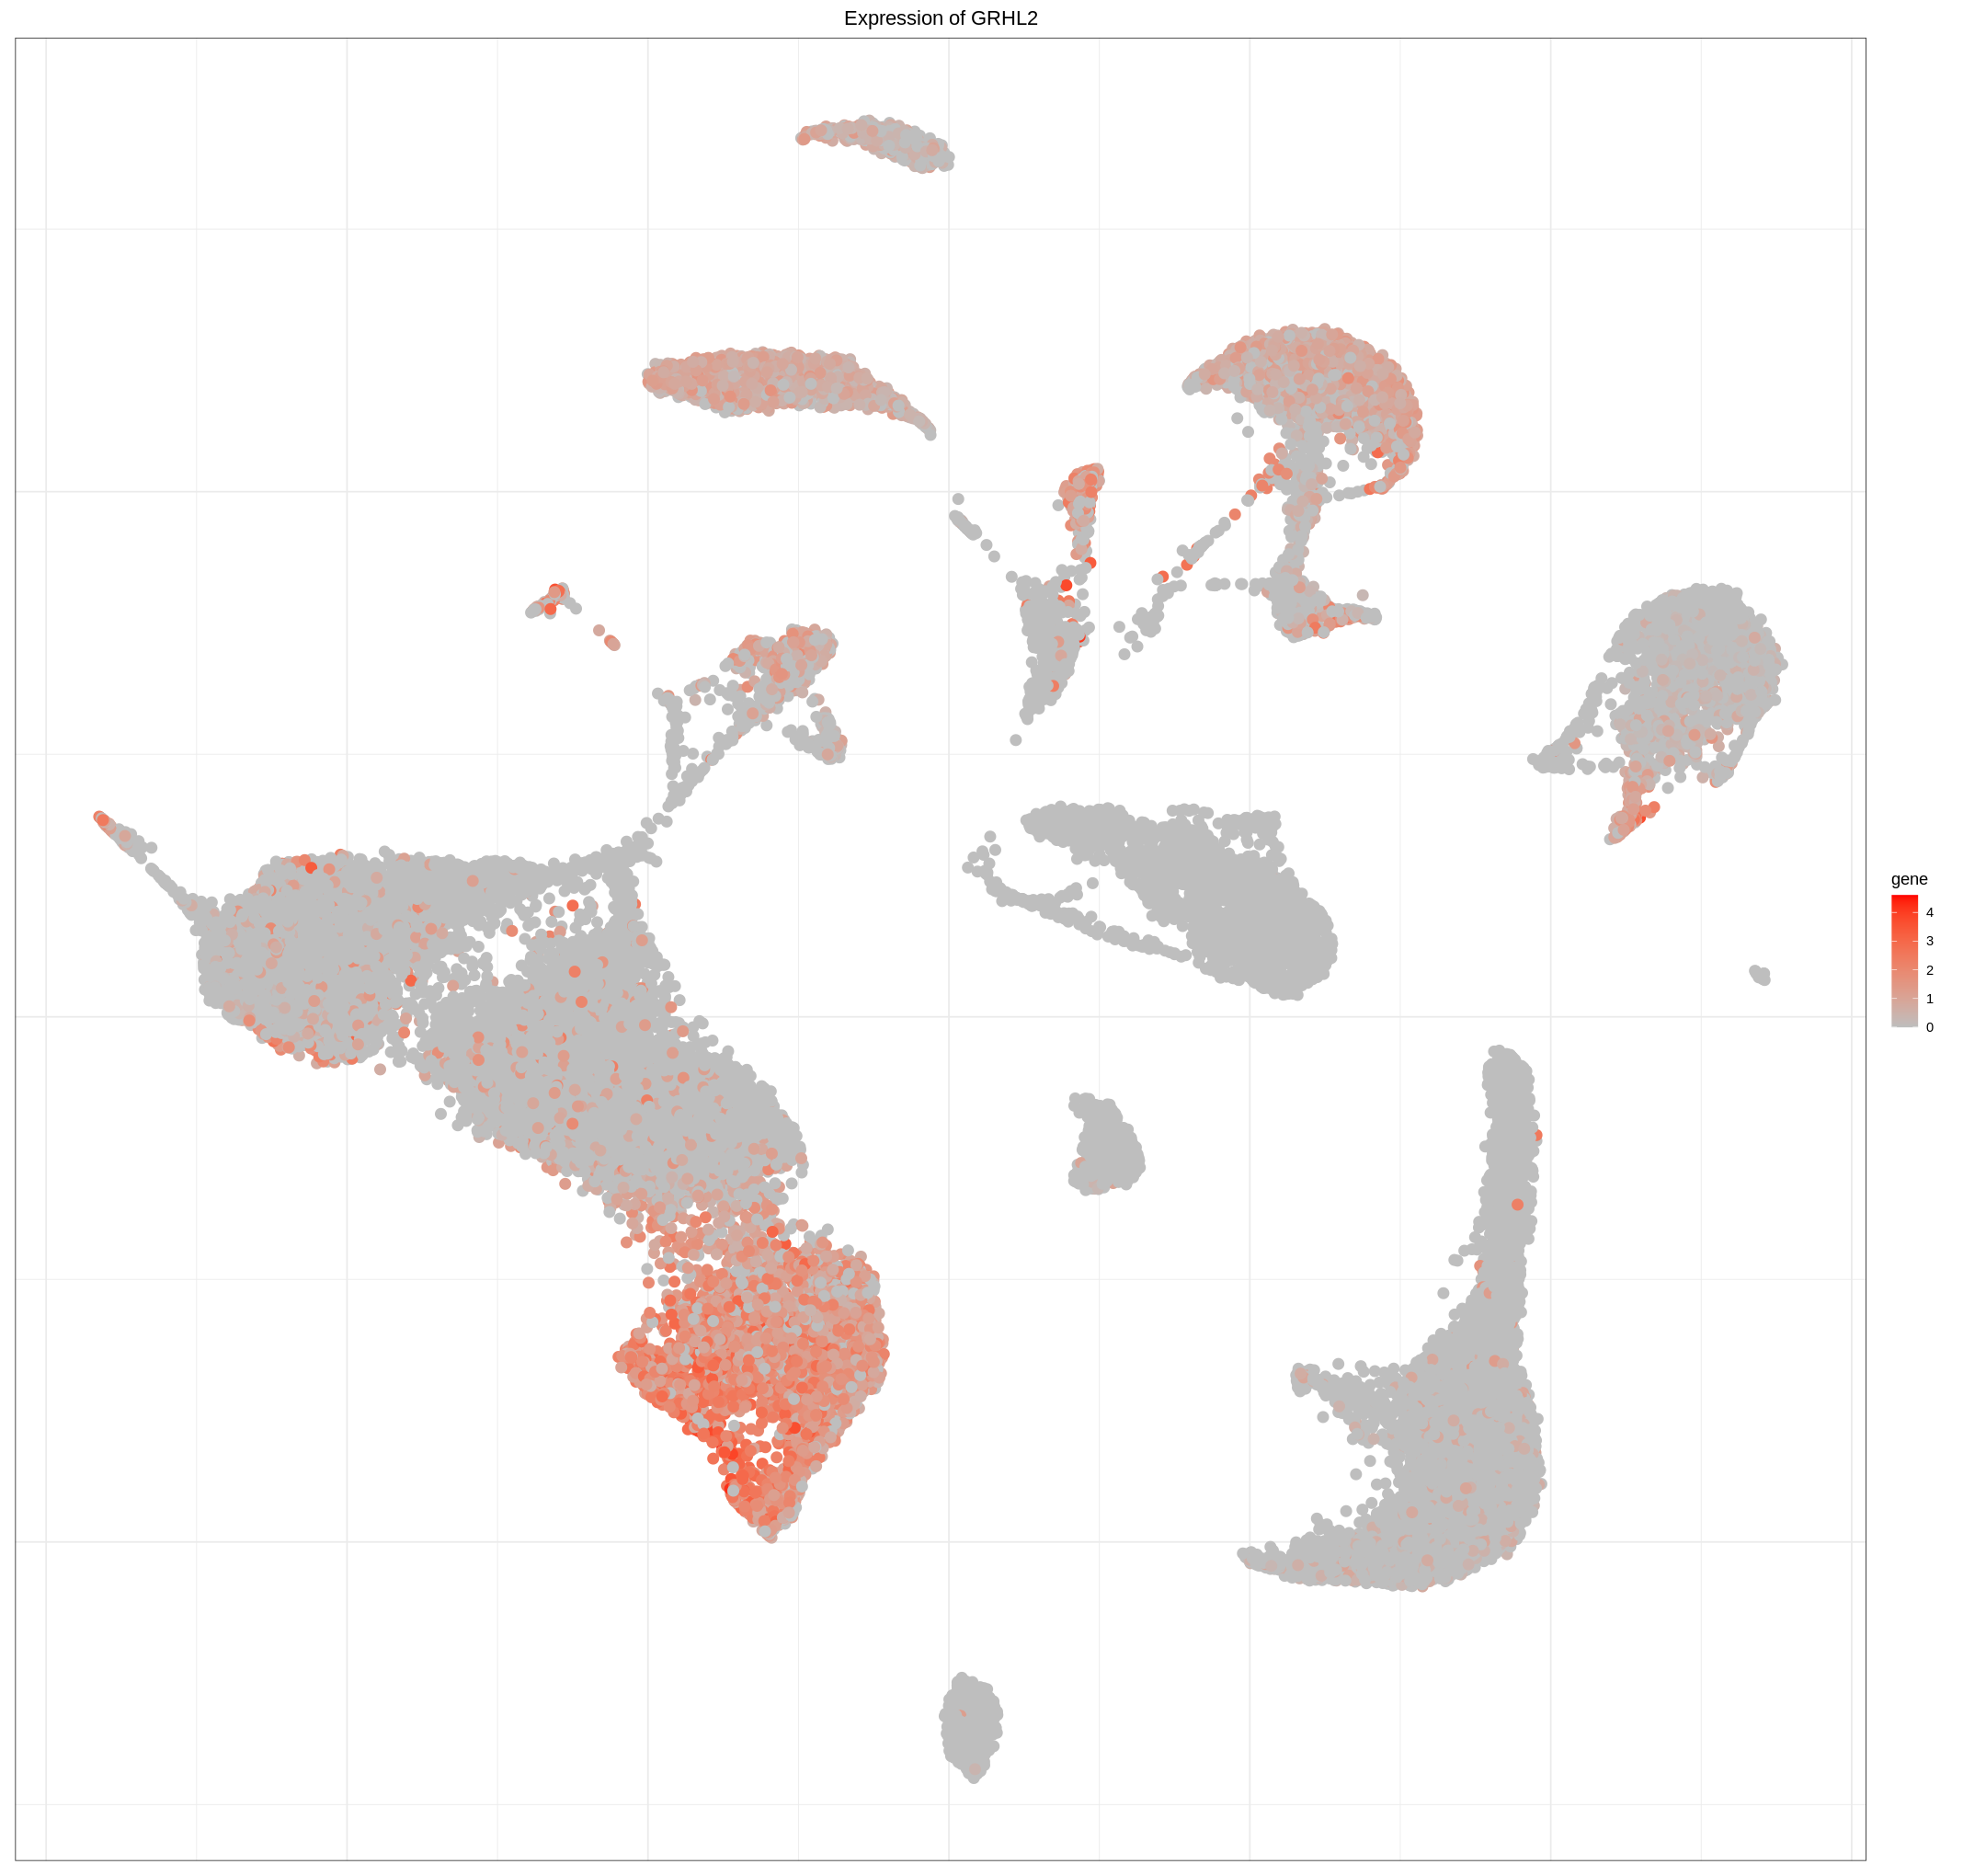

In [23]:
gene <- "GRHL2"
gene_table <- bind_cols(embryo.integrated@meta.data, as.data.frame(embryo.integrated@reductions$umap@cell.embeddings), as.data.frame(FetchData(embryo.integrated, vars = gene))) %>%
  dplyr::rename(gene = length(colnames(.)))

plot <- gene_table %>%
  ggplot(aes(UMAP_1, UMAP_2, color = gene)) +
  geom_point(size = 3) +
  theme_bw() +
  theme(plot.margin = unit(c(0.25,1,0.25,0.25), "cm"),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        plot.title = element_text(hjust = 0.5)) +
  scale_color_gradient(low = "grey", high = "red") +
  ggtitle(paste0("Expression of ", gene))

plot

In [24]:
ggsave(
  paste0("/home/adufour/work/notebook/plots/features/UMAP_stemcells_", gene, ".svg"),
  plot,
  height = 18,
  width = 20
)